<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Decision Tree

Ein Entscheidungsbaum ist ein geordneter, gerichteter Baum. Durch die grafische Darstellung als Baumdiagramm werden hierarchisch aufeinanderfolgende Entscheidungen veranschaulicht. 

### Initializations

Zunächst sind die für den Decision Tree benötigten Bibliotheken zu importieren, eine Klasse für Textstyles zu definieren sowie die benötigten Datensets zu laden. 
Diese sind bereits in Trainings- und Testdaten unterteilt, sodass sich in X_train und y_train lediglich Trainingsdaten befinden, welche als Basis für die Modelle dienen. X_test und y_test wiederum werden für die Bewertung des Modells herangezogen. Um Ungenauigkeiten, die der Skalierung der Daten geschuldet sind, zu vermeiden, werden zusätzlich skalierte Datensets eingelesen (X_train_scaled und y_test_scaled). Im nächsten Schritt wird die Methode "plot_learning_curve" definiert. Diese generiert ein Diagramm, welches die Learning Curve der Trainings- und Testdaten abbildet. An dem Ergebnis kann abgelesen werden, ob beispielsweise ein Under- oder Overfitting vorliegt. 
Die rote Linie zeigt, inwiefern das Modell auf die Trainingsdaten angepasst werden kann und die grüne, wie gut dieses Modell für Testdaten geeignet ist. 
Auf der x-Achse wird angezeigt, wie viele Trainingsdaten herangezogen werden und auf der y-Achse wird entsprechend angezeigt, welchen Crossvalidation Score die zugeführten Trainings- bzw die Testdaten erreichen.

In [31]:
# benötigte Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
#Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [1]:
#Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

NameError: name 'np' is not defined

### Use Decision Tree

Nachdem die Trainings- und Testdaten sowie die benötigten Bibliotheken importiert und die Methode der Learning Curve definiert ist, wird der Decision Tree initialisiert und das erste Modell erstellt. Mit Hilfe des Scores wird ein Einblick in die Qualität des Modells gewährt. Die anschließend generierte Confusion Matrix und der Classification Report werden ebenfalls zur Evaluation des Modells herangezogen. Die Confusion Matrix stellt dar, wie viele Datensätze richtig bzw falsch einsortiert wurden. Der Classification Report enthält die Evaluationswerte Precision, Recall und F1-Score. Die einzelnen Werte zu Precision, Recall und F1-Score können voneinander abweichen. In diesem Fall jedoch, sind alle Werte bei 98%. Anhand der nachfolgenden Learning Curve lässt sich erkennen, dass das Modell zu 100%) auf die Trainingsdaten passt und der Testscore mit zunehmender Datensatzanzahl steigt. Dies bedeutet, dass weder ein Over- noch ein Underfitting vorliegt. 

In [15]:
#Decision Tree initialisieren
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
#Score berechnen
clf.score(X_test_scaled, y_test)

0.96799999999999997

In [17]:
#Confusion Matrix und Classification Report erstellen
clf_predictions = clf.predict(X_test_scaled)

In [18]:
print(confusion_matrix(y_test, clf_predictions))

[[1499   37]
 [  27  437]]


In [19]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1536
          1       0.92      0.94      0.93       464

avg / total       0.97      0.97      0.97      2000



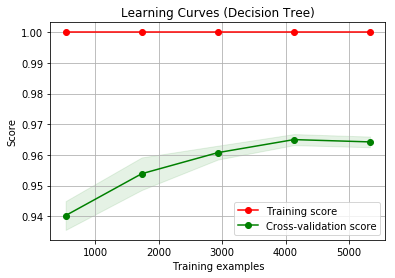

In [20]:
#Learning Curve berechnen
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

#### Graphische Darstellung des Entscheidungsbaums

Vorteil des Entscheidungsbaumes ist die grafische Darstellung der Entscheidungsregeln. Dies erfordert die Installation der Bibliothek graphviz und pydotplus. 

In [32]:
#graphviz installieren 
!pip install graphviz
import graphviz

In [33]:
#Entscheidungsbaum exportieren
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')

In [34]:
graph = graphviz.Source('temp/tree.dot')

In [35]:
#pydotplus installieren
! pip install pydotplus

In [36]:
#weitere Bibliotheken importieren
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image

In [38]:
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree.png");
print("Decision Tree Graph:")

Decision Tree Graph:


<img src='temp/my_tree.png' width="100%" align="center" />

### Use Decision Tree w/o department

Im zuvor generierten Decision Tree ist zu erkennen, dass eine Vielzahl an Entscheidungsregeln genutzt werden. Um den den Baum zu schmälern sowie die durchzurechnenden Kombinationsmöglichkeiten zu reduzieren, wird im Folgenden die Spalte des Departments nicht mehr berücksichtigt. Die Wahl, das Department aus dem Datensatz rauszunehmen, ist darin begründet, dass bereits im Notebook 'bi_visual' festgestellt wurde, dass es voraussichtlich keinen bedeutenden Unterschied macht, in welchem Department der Mitarbeiter gearbeitet hat - die Verteilung der Kündigung ist ähnlich.

In [45]:
#Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')
#df = np.load(file='exchange/hr_06_premodel.npy')

In [46]:
#Decision Tree initialisieren
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [47]:
clf.score(X_test_scaled, y_test)

0.97450000000000003

In [48]:
clf_predictions = clf.predict(X_test_scaled)

In [49]:
cm = confusion_matrix(y_test, clf_predictions)
print(cm)

[[1510   26]
 [  25  439]]


In [50]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [51]:
cm_dict.item().update({'decision_tree':{'cm': cm, 'label': 'Decision Tree' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [52]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1536
          1       0.94      0.95      0.95       464

avg / total       0.97      0.97      0.97      2000



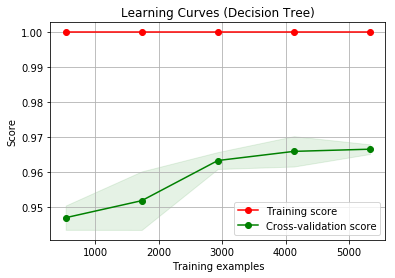

In [53]:
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

#### Graphische Darstellung des Entscheidungsbaums

In [54]:
# Install graphviz on MacOS: http://macappstore.org/graphviz/
!pip install graphviz
import graphviz

In [55]:
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')


In [56]:
graph = graphviz.Source('temp/tree.dot')


In [57]:
! pip install pydotplus

In [58]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image


In [59]:
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree_wodept.png");
print("Decision Tree Graph:")

Decision Tree Graph:


<img src='temp/my_tree_wodept.png' width="100%" align="center" />

### Hyperparameter Tuning Using GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [79]:
clf = DecisionTreeClassifier()

In [80]:
param_space = { 'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 5, 10, 20, 50]}

In [81]:
gs = GridSearchCV(clf, param_space, cv=10, n_jobs=-1)

In [82]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


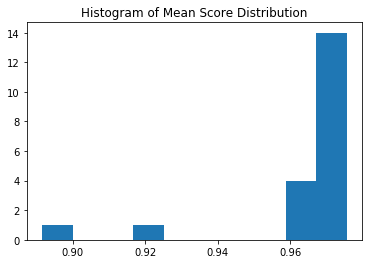

In [83]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [84]:
gs.best_score_

0.97550000000000003

In [85]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [86]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, splitter='best')

In [87]:
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
clf.score(X_test_scaled, y_test)

0.98250000000000004

In [89]:
predictions = clf.predict(X_test_scaled)

In [90]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.986625
Test Accuracy  ::  0.9825


In [91]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1525   11]
 [  24  440]]


In [92]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [93]:
cm_dict.item().update({'random_forest':{'cm': cm, 'label': 'Random Forest' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [94]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1536
          1       0.98      0.95      0.96       464

avg / total       0.98      0.98      0.98      2000



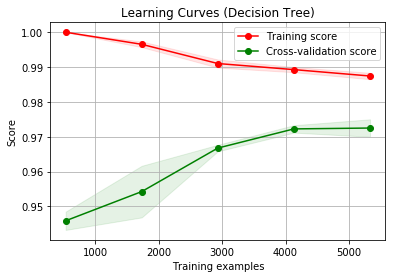

In [95]:
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

#### Graphische Darstellung des Entscheidungsbaums

In [96]:
# Install graphviz on MacOS: http://macappstore.org/graphviz/
!pip install graphviz
import graphviz

In [97]:
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')


In [98]:
graph = graphviz.Source('temp/tree.dot')


In [99]:
! pip install pydotplus

In [100]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image


In [101]:
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree_tuned.png");
print("Decision Tree Graph:")

Decision Tree Graph:


<img src='temp/my_tree_tuned.png' width="100%" align="center" />

### Feature Selection for Decision Tree

In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [103]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


In [104]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [105]:
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [64]:
len(columns)

9

In [65]:
for i in range(0,5):
    print(len(set(it.combinations(columns,i))))

1
9
36
84
126


In [66]:
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf = DecisionTreeClassifier()
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination     score
0  yearsSinceEvaluation,gotPromotion,salary,hasLe...  0.974000
0                 workAccident,salary,hasLeftCompany  0.973625
0         yearsSinceEvaluation,salary,hasLeftCompany  0.973000
0    workAccident,gotPromotion,salary,hasLeftCompany  0.972499
0                              salary,hasLeftCompany  0.972123


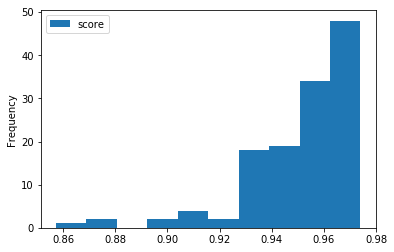

In [68]:
results.plot.hist();

In [69]:
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"yearsSinceEvaluation,gotPromotion,salary,hasLe...",0.974000
0,"workAccident,salary,hasLeftCompany",0.973625
0,"yearsSinceEvaluation,salary,hasLeftCompany",0.973000
0,"workAccident,gotPromotion,salary,hasLeftCompany",0.972499
0,"salary,hasLeftCompany",0.972123
0,"workAccident,hasLeftCompany",0.972000
0,"workAccident,gotPromotion,hasLeftCompany",0.971749
0,"yearsSinceEvaluation,workAccident,salary,hasLe...",0.971375
0,"yearsSinceEvaluation,gotPromotion,hasLeftCompany",0.971252
0,"yearsSinceEvaluation,hasLeftCompany",0.971127


In [70]:
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"satisfactionLevel,yearsAtCompany,salary,hasLef...",0.925125
0,"yearsSinceEvaluation,numberOfProjects,yearsAtC...",0.914874
0,"numberOfProjects,averageMonthlyHours,yearsAtCo...",0.913501
0,"satisfactionLevel,yearsSinceEvaluation,average...",0.910749
0,"yearsSinceEvaluation,averageMonthlyHours,years...",0.905876
0,"satisfactionLevel,averageMonthlyHours,yearsAtC...",0.892623
0,"satisfactionLevel,yearsSinceEvaluation,yearsAt...",0.892377
0,"satisfactionLevel,numberOfProjects,yearsAtComp...",0.878875
0,"satisfactionLevel,yearsSinceEvaluation,numberO...",0.874499
0,"satisfactionLevel,numberOfProjects,averageMont...",0.857246
